# **Loan Application Status Prediction**

**Problem Statement:**

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

**Independent Variables**:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

**Dependent Variable (Target Variable):**

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#Importing all needed libraries and packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the CSV file of the Dataset
Loan = pd.read_csv('/content/drive/MyDrive/Python_Datasets/loan_prediction.csv')

In [ ]:
# Calling the dataset
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#Examining the Data
#After importing the data, to learn more about the dataset, we’ll use .head() .info() and .describe() methods

Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Information about the Dataset
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Observation :**

We have both object and numerical values present in the dataset . Loan_Status is our Target variable in which we have classes .

In [ ]:
#The shape of the Dataset 
Loan.shape

(614, 13)

**Observation :**

We have 614 rows i.e, instances of Loan and 13 columns i.e, specification like LoanAmount,Loan_Status,Gender etc in our Dataset.

In [ ]:
#After checking data will check description and get to know minimum value, max value, standard deviation etc.:

Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
#Checking for Null Values
Null_Values = Loan.isnull().sum().reset_index(name = 'Number of Null Values')
Null_Values

,index,Number of Null Values
0,Loan_ID,0
1,Gender,13
2,Married,3
3,Dependents,15
4,Education,0
5,Self_Employed,32
6,ApplicantIncome,0
7,CoapplicantIncome,0
8,LoanAmount,22
9,Loan_Amount_Term,14


**Observation :**
There are null values present in the Dataset , which is needed to be handled now.

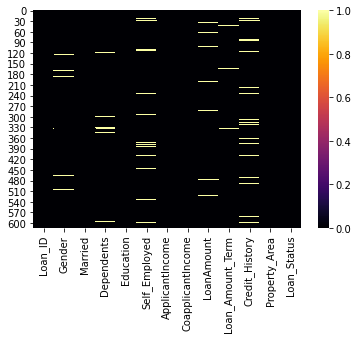

In [ ]:
#Checking for Null values by passing a HeatMap Function 

sns.heatmap(Loan.isnull(),cmap='inferno')

**Observation :**
We see that none of the missing values in the dataset exists more than 8% per attribute

**Filling all Null Values**

In [3]:
#Filling all Null Values with mode value 

Loan['Gender']=Loan['Gender'].fillna(Loan['Gender'].mode()[0])
Loan['Married']=Loan['Married'].fillna(Loan['Married'].mode()[0])
Loan['Dependents']=Loan['Dependents'].fillna(Loan['Dependents'].mode()[0])
Loan['Self_Employed']=Loan['Self_Employed'].fillna(Loan['Self_Employed'].mode()[0])
Loan['LoanAmount']=Loan['LoanAmount'].fillna(Loan['LoanAmount'].median())
Loan['Loan_Amount_Term']=Loan['Loan_Amount_Term'].fillna(Loan['Loan_Amount_Term'].mode()[0])
Loan['Credit_History']=Loan['Credit_History'].fillna(Loan['Credit_History'].mode()[0])

In [5]:
Loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Handling Imbalanced Data

In [ ]:
Loan['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [4]:
Loan['Dependents'].replace('3+',3,inplace=True)

In [5]:
Loan['Dependents'] = Loan['Dependents'].astype('int')
Loan['Credit_History'] = Loan['Credit_History'].astype('int')
Loan['CoapplicantIncome'] = Loan['CoapplicantIncome'].astype('int')
Loan['Loan_Amount_Term'] = Loan['Loan_Amount_Term'].astype('int')

In [8]:
Loan.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Checking all unique values in every column of the Dataset .
Loan.apply(lambda x: len(x.unique()))

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Observation :**
 This represents number of categories of particular type of data.
As, Loan_Status which is going to be target variable is having 2 types of data so one will be using Logistic Regression

In [9]:
# Checking total no. of occurences of unique values in Loan_Status
Loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**Observation :**
422 customers have been approved for loan and 192 customers have not been approved for loan .

In [7]:
#Drop Irrelevant Columns
Loan.drop('Loan_ID',axis=1,inplace=True)

Loan_ID has continous values and is not needed to predict the Loan_Status . Hence we will drop Loan_ID from the Dataset .

In [ ]:
Loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,128.0,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128.0,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141.0,360,1,Urban,Y


In [11]:
# checking the features, their shape, duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", Loan.columns)
shape=Loan.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", Loan.dtypes)
print("\nDataset contains any NaN/Empty cells : ", Loan.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", Loan.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in Loan.columns.values:
    print("Number of unique values of {} : {}".format(col, Loan[col].nunique()))
    
print ('\nLoan_Approved and Not_Approved counts','\n',Loan.Loan_Status.value_counts())


Features Present in the Dataset: 
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Total Number of Rows :  614
Total Number of Features :  12


Data Types of Features :
 Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

Dataset contains any NaN/Empty cells :  False

Total number of empty rows in each feature:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan

# **EDA(Exploratory Data Analysis)**

**1.Univariant_Analysis**

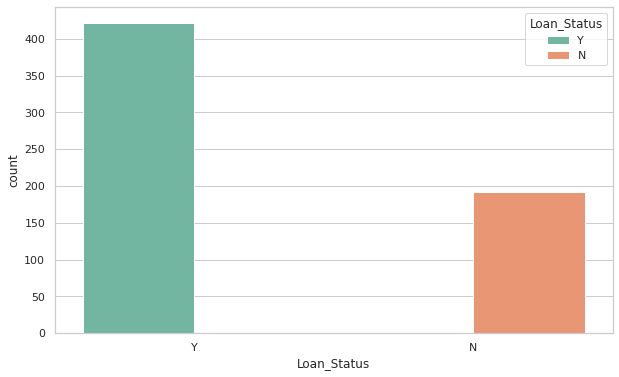

In [ ]:
# Plotting Loan_Status Distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='Loan_Status',data=Loan,hue='Loan_Status',saturation=.75,palette='Set2')
plt.show()

**Observation:**
The loan count status has been approved for almost 422 people out of 614 peoples , whereas for 192 peoples loan has not been approved .

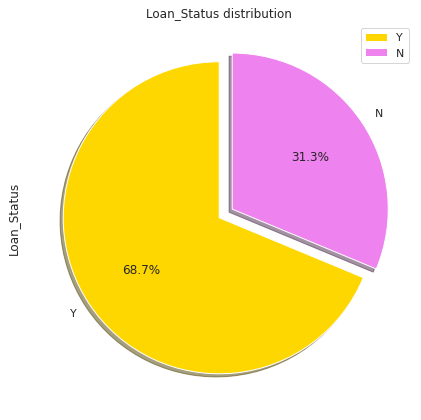

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
order = list(Loan['Loan_Status'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['gold','violet']
explode = (0,0.1)
Loan['Loan_Status'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Loan_Status distribution');
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

**Observation :**
69% of the total applicants get their loans approved while only 31% gets denied.

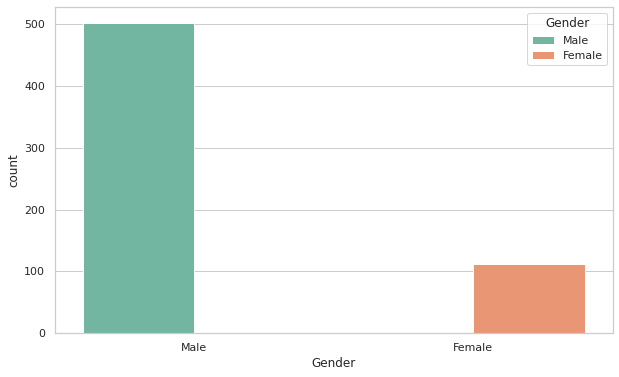

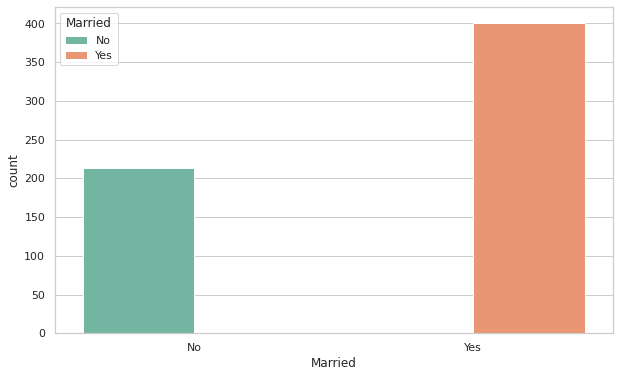

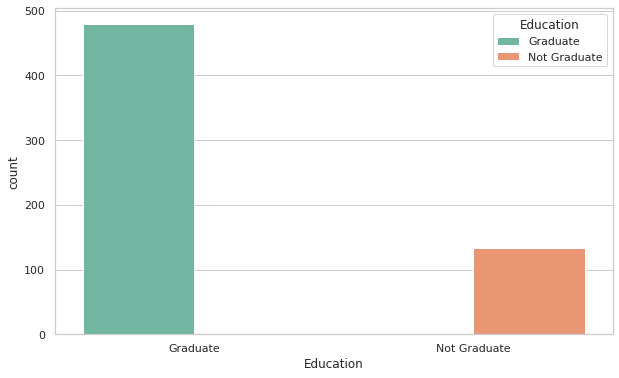

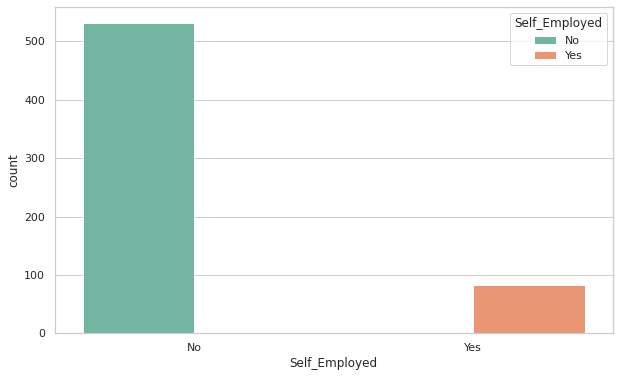

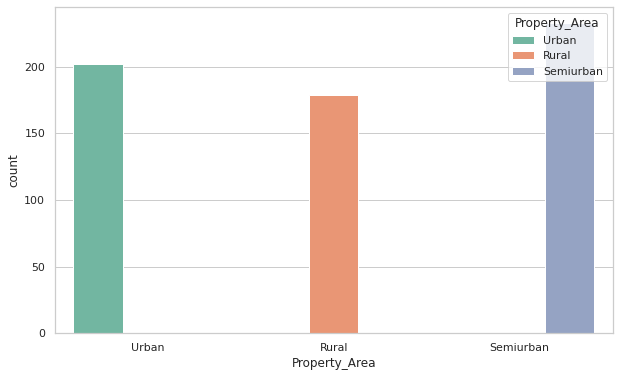

In [ ]:
# Plotting Gender Distribution
sns.set_theme(style="whitegrid")

a = ['Gender','Married','Education','Self_Employed','Property_Area']
for i in a:
  plt.figure(figsize=(10,6))
  sns.countplot(x=i,data=Loan,hue=i,saturation=.75,palette='Set2')
  plt.show()

**Observation :**

1. We can see that approximately 81% are Male and 19% are female.
2. Percentage of applicants with no dependents is higher.
3. There are more number of graduates than non graduates.
4. Semi Urban people is slightly higher than Urban people among the applicants.
5. Larger Percentage of people have a good credit history.
6. The percentage of people that the loan has been approved has been higher rather than the percentage of applicant for which the loan has been declined.


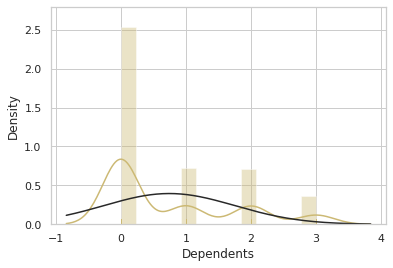

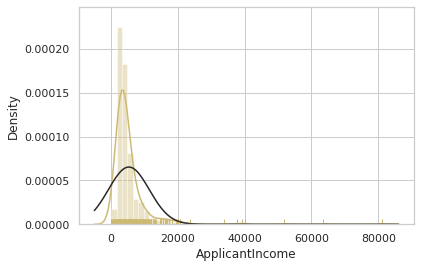

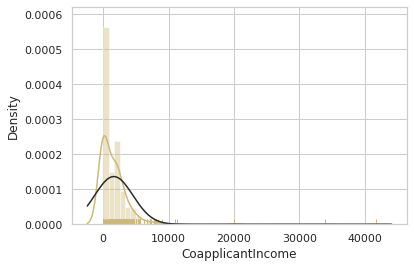

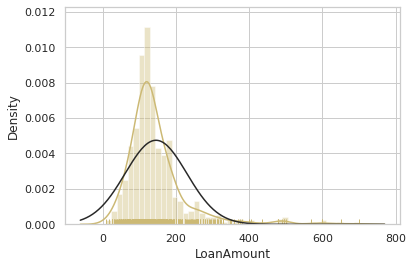

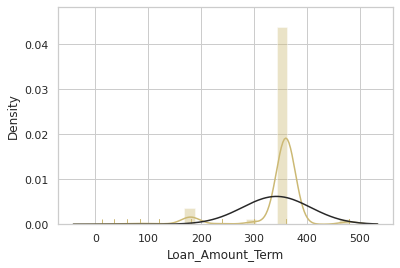

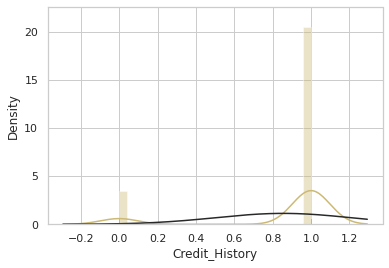

In [ ]:
#Checking skewness for numerical columns using distplot
from scipy.stats import norm

for g in Loan.describe().columns:
    sns.distplot(Loan[g] , rug=True , color = 'y' , fit=norm)
    plt.show()

**Observation :**

1. Columns Namely Loan_Amount_Term , Credit_History are Right Skewed.
2. Columns Namely CoapplicantIncome,LoanAmount ,ApplicantIncome are left skewed .

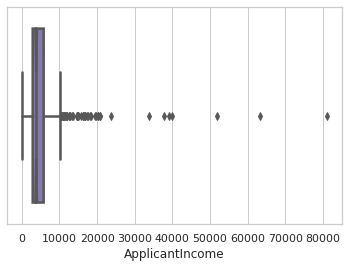

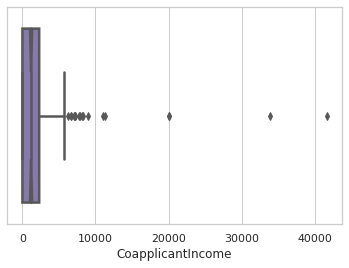

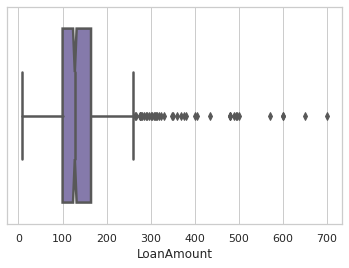

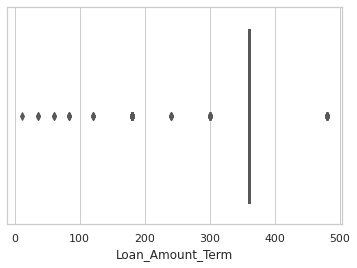

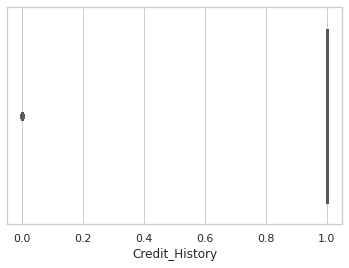

In [ ]:
COL = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for i in COL:
  sns.boxplot(Loan[i], notch=True,color='m',linewidth=2.5)
  plt.show()

**Observation :**
There are some outliers present in most of the columns . Hence we will deal with outliers in coming steps .

**2.Bivariant Analysis**

Now Lets check relationship between all feature attributes and Target variables

<Figure size 576x360 with 0 Axes>

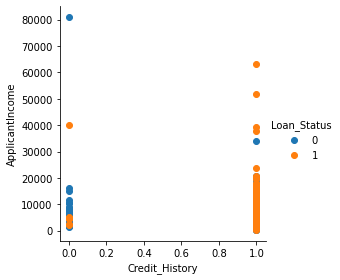

In [52]:
plt.figure(figsize=(8,5))
sns.set_style = ("whitegrid");
sns.FacetGrid(Loan,hue='Loan_Status',size=4).map(plt.scatter,'Credit_History','ApplicantIncome').add_legend();
plt.show()
  

**Observation :**
Applicant income which is less than 20,000 and Credit History which is 0 can be segregated as NO for Loan_Status.

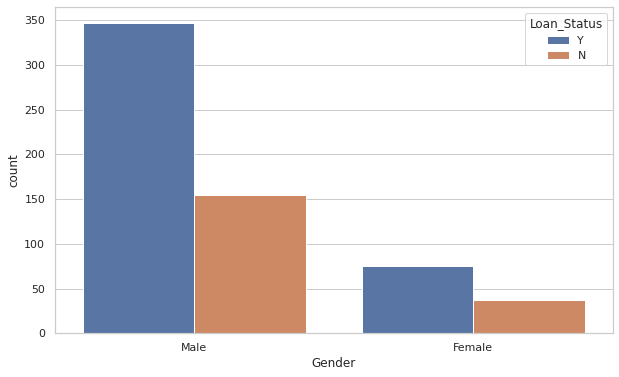

In [ ]:
#Checking Relation between Gender and Loan_Status
plt.figure(figsize=(10,6))
sns.countplot(Loan['Gender'],hue=Loan.Loan_Status)

**Observation :**
The loan status approval rate is high for male candiate and also has 30% of rejection rate.for female candiate,the approval is half of the candiate applied for the loan.

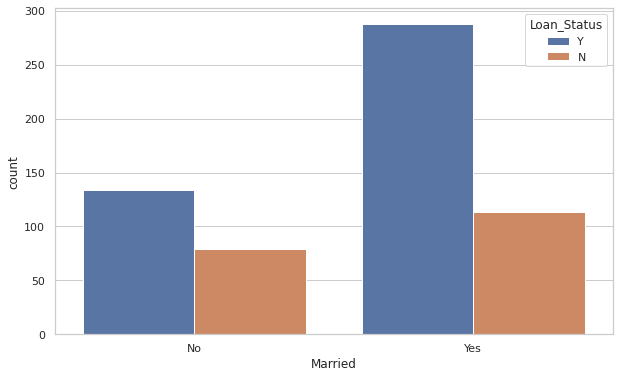

In [ ]:
#Checking Relation between Married and Loan_Status
plt.figure(figsize=(10,6))
sns.countplot(Loan['Married'],hue=Loan.Loan_Status)

**Observation :**
The loan status approval rate is high for married candiate and also has 40% of rejection rate.for unmarried candiate,the approval is low for the candiate applied for the loan.

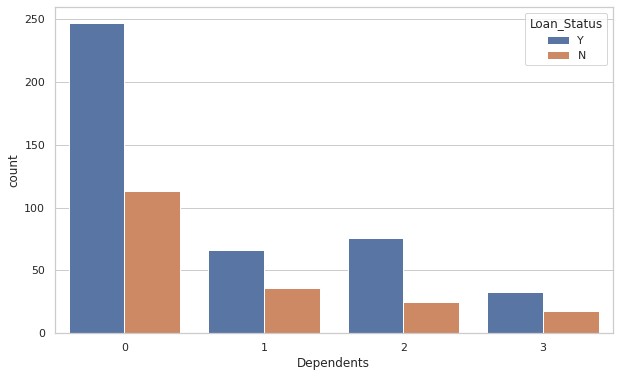

In [ ]:
#Checking Relation between Dependants and Loan_Status
plt.figure(figsize=(10,6))
sns.countplot(Loan['Dependents'],hue=Loan.Loan_Status)

**Observation** the chance for approval rate is high for no dependent . 1,2,3+ dependent people- the chance of approval is low when compared to No dependent people.The percentage of applicants with either 0 or 2 dependents have got their loan approved is higher.

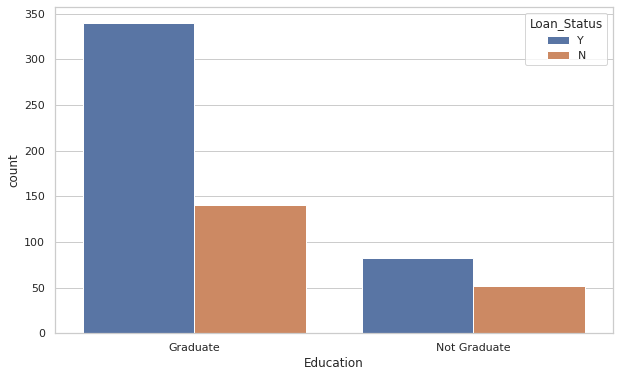

In [ ]:
#Checking Relation between Education and Loan_Status
plt.figure(figsize=(10,6))
sns.countplot(Loan['Education'],hue=Loan.Loan_Status)

**Observation :**
The Graduated people has high chance of approval rate with 30% rejection rate.The Not Graduated people has low chance of approval rate with more rejection.

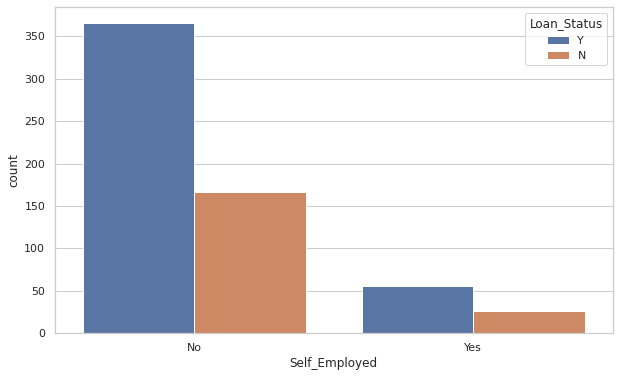

In [ ]:
#Checking Relation between Self_Employed and Loan_Status
plt.figure(figsize=(10,6))
sns.countplot(Loan['Self_Employed'],hue=Loan.Loan_Status)

**Observation :**
The Self Employed candiate has more chance of loan rejection rate.

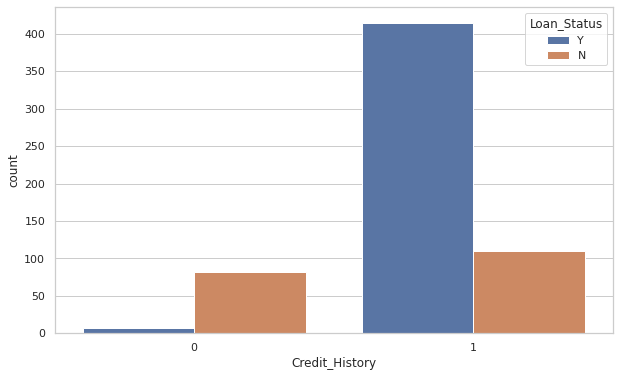

In [ ]:
#Checking Relation between Credit_History and Loan_Status
plt.figure(figsize=(10,6))
sns.countplot(Loan['Credit_History'],hue=Loan.Loan_Status)

**Observation :**
The chance of approval rate is high for person whose credit history is classified from section 1.The chance of rejection rate of 90% whose credit history is classified from section 0.

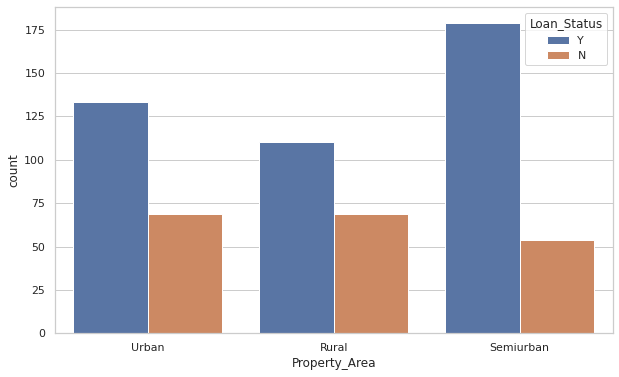

In [ ]:
#Checking Relation between Property_Area and Loan_Status
plt.figure(figsize=(10,6))
sns.countplot(Loan['Property_Area'],hue=Loan.Loan_Status)

**Observation :**
Semiurban- the chance for approval rate is high with 30% rejection rate. Urban-the approval rate is half of the application. Rural-the approval rate is low with 60% rejection rate.

**Performing Label Encoder**

In [9]:
# Performing Label Encoder for categorical Values.

cols=['Gender', 'Married', 'Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    Loan[i]=le.fit_transform(Loan[i])

In [13]:
#Checking the Dataset 
Loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128.0,360,1,2,1
1,1,1,1,0,0,4583,1508,128.0,360,1,0,0
2,1,1,0,0,1,3000,0,66.0,360,1,2,1
3,1,1,0,1,0,2583,2358,120.0,360,1,2,1
4,1,0,0,0,0,6000,0,141.0,360,1,2,1


**3.Multivariant Analysis**

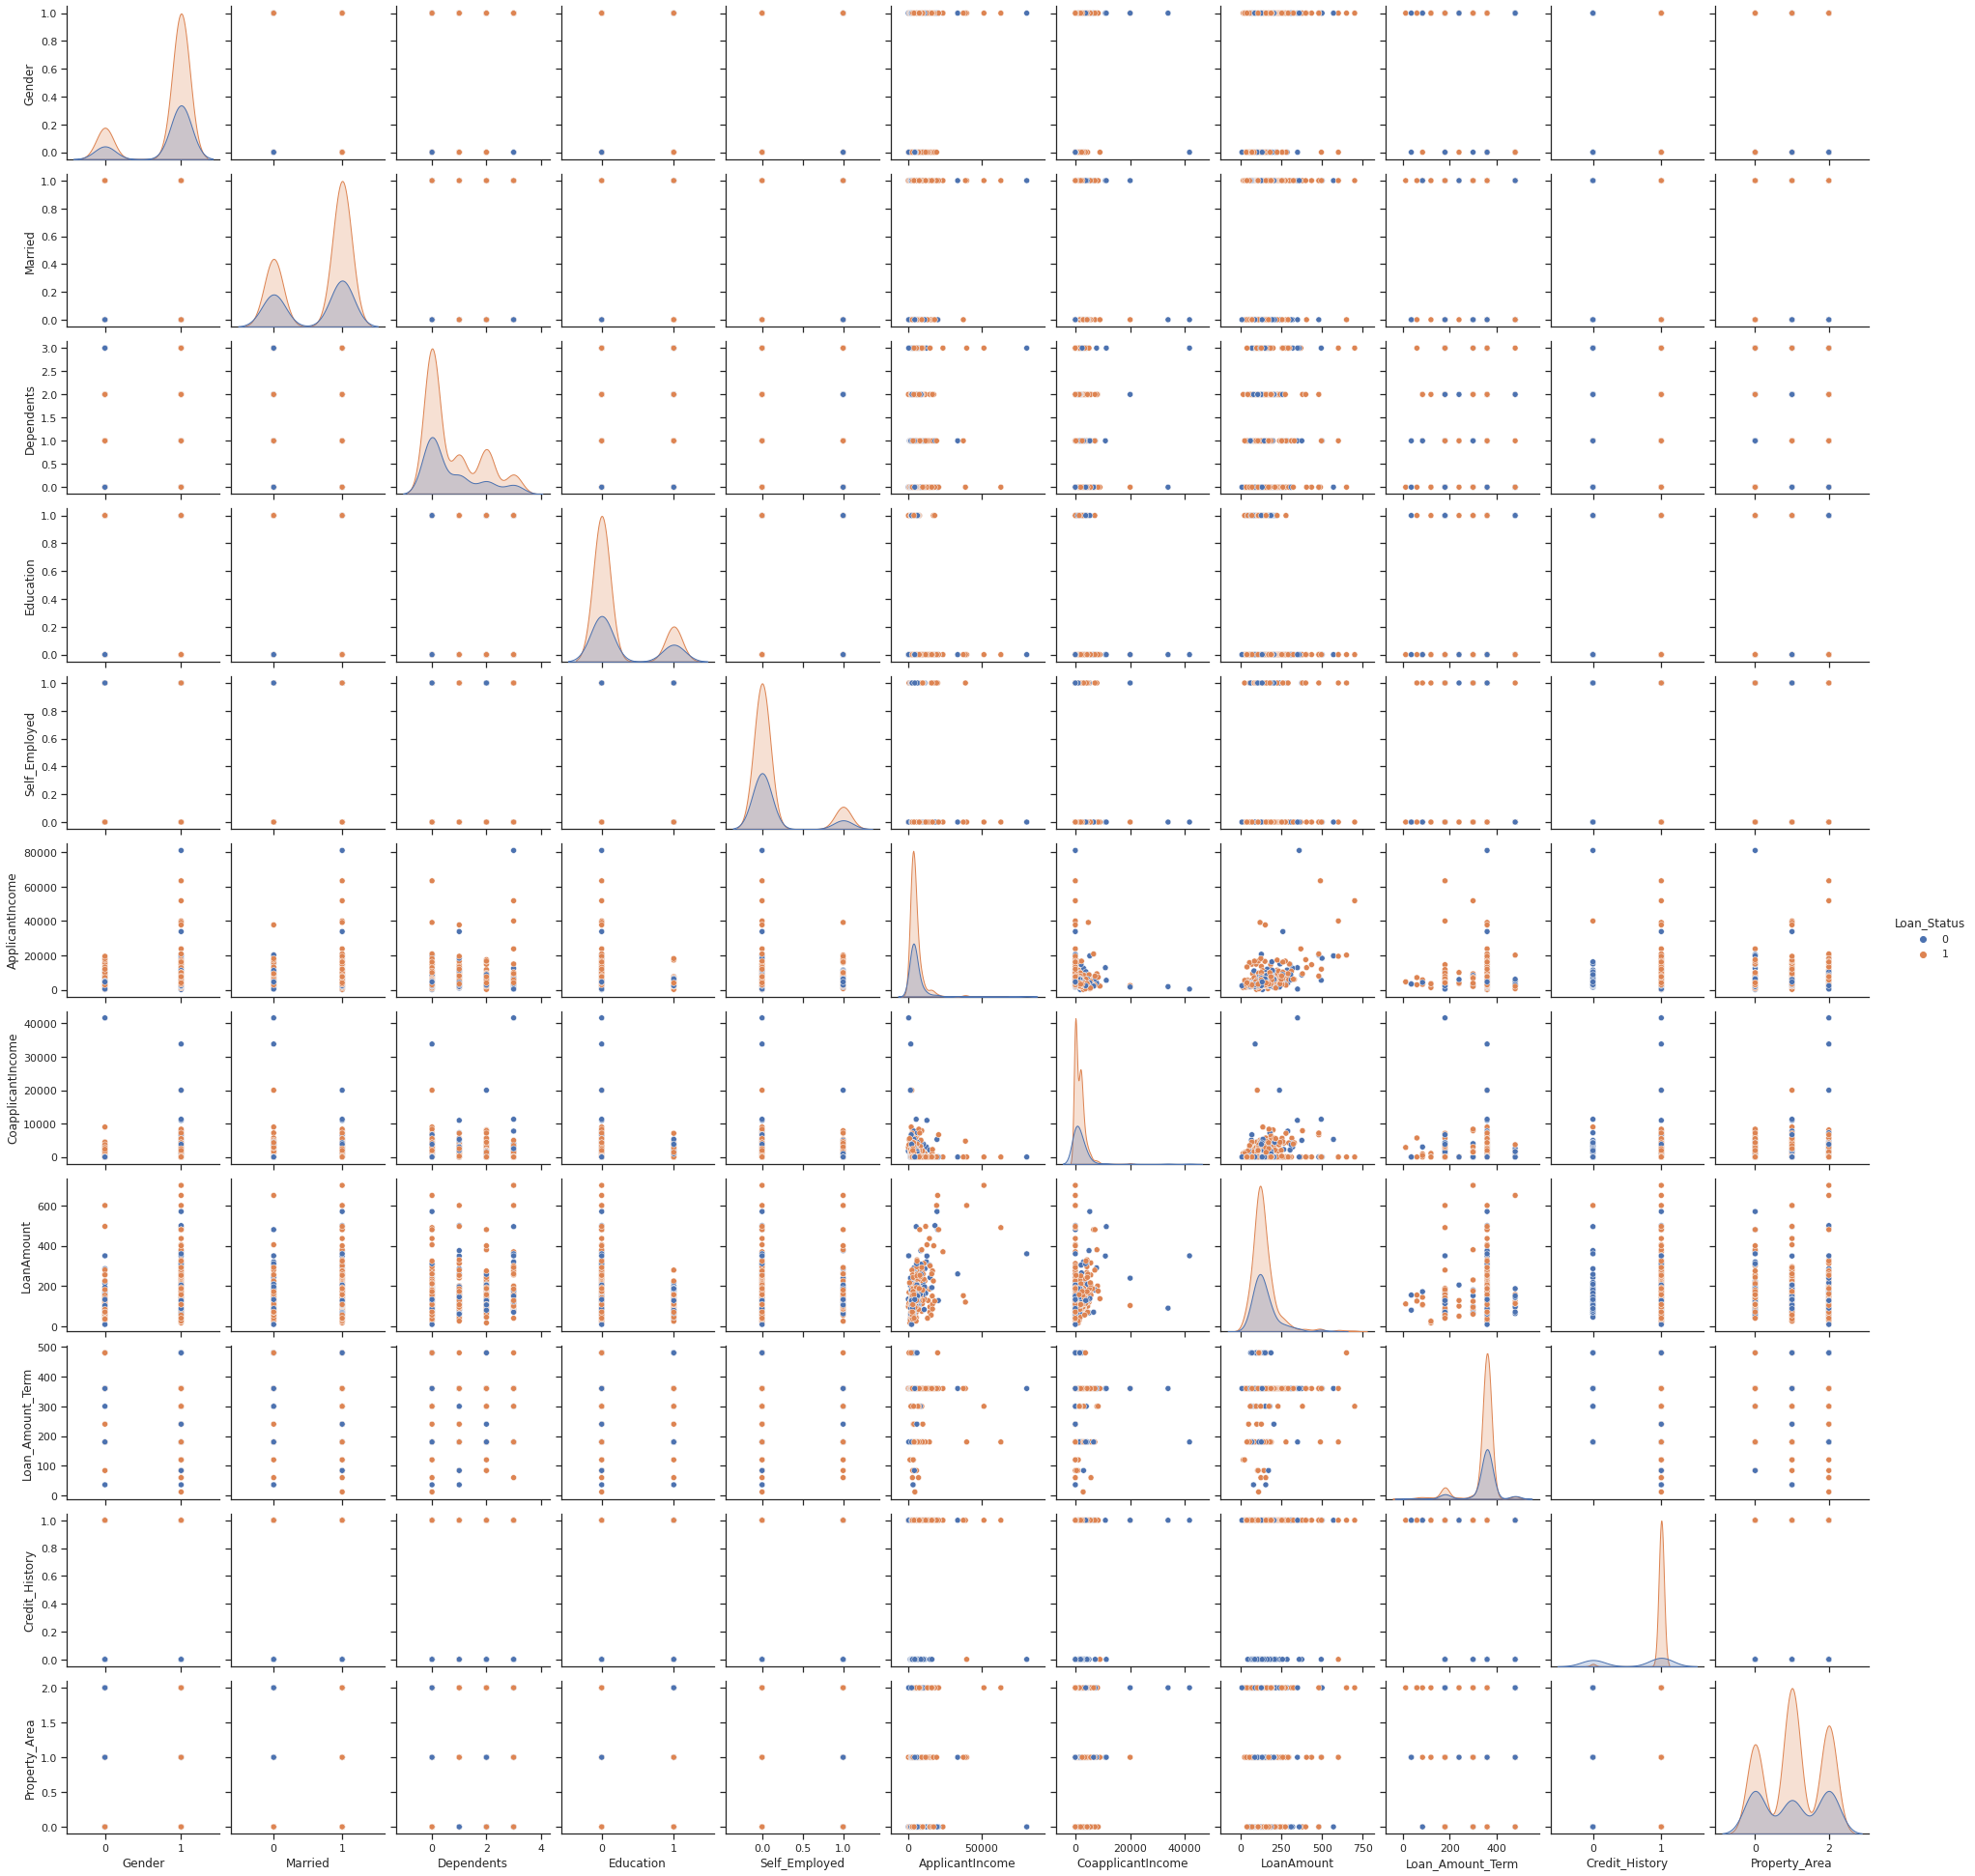

In [ ]:
sns.set(style='ticks')
sns.pairplot(Loan,hue='Loan_Status')

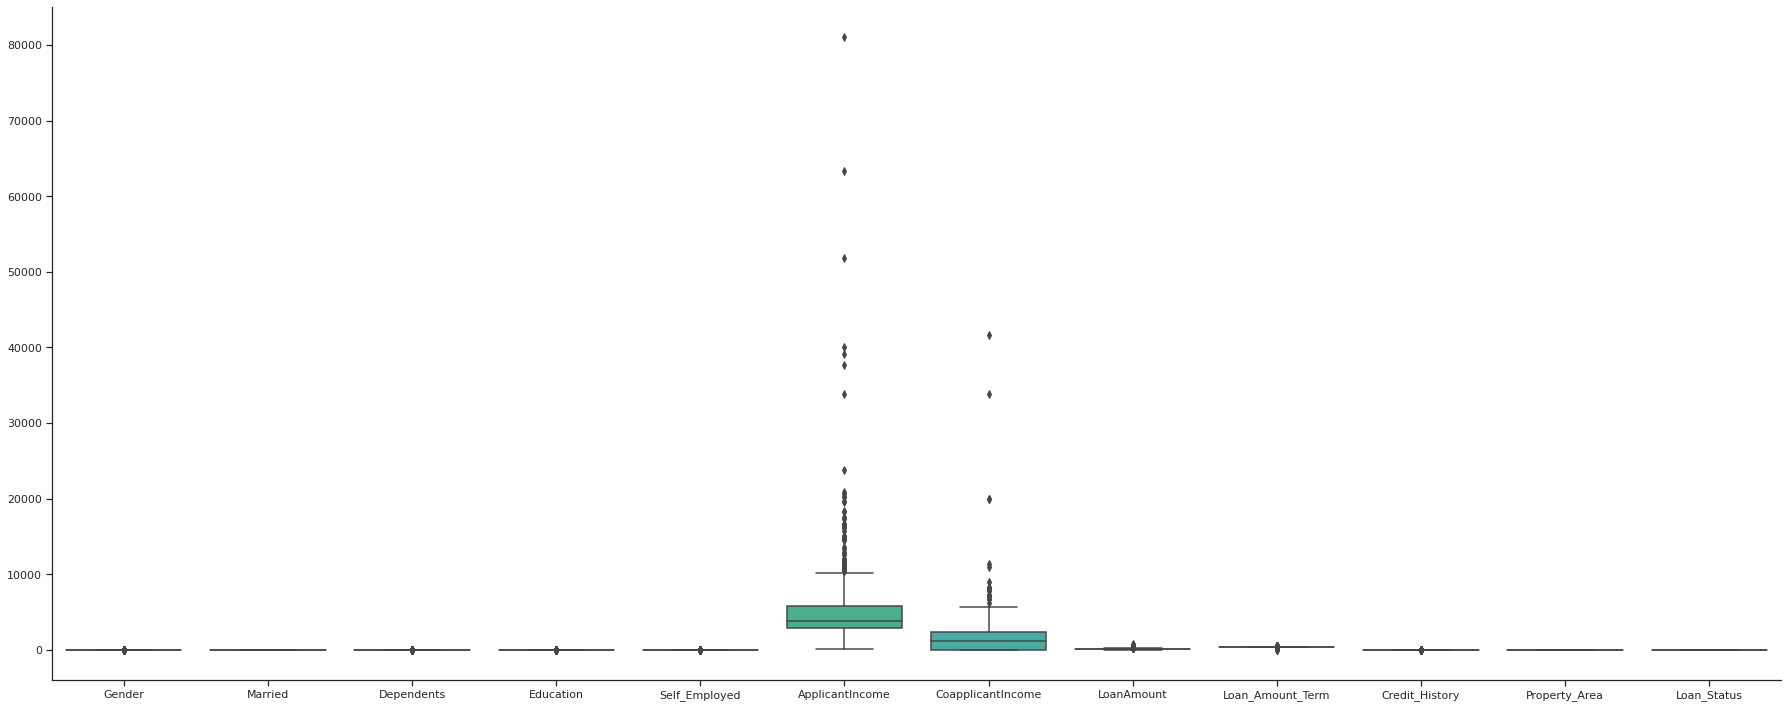

In [ ]:
sns.factorplot(data=Loan,kind='box',size=10,aspect=2.5) 

**Checking Correlation between Variables**

In [ ]:
cor = Loan.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075947,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030429,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116604,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075947,0.030429,-0.062290,-0.016100,-0.116604,1.000000,0.189218,-0.059382,0.011134,0.010521,-0.059188
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059382,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


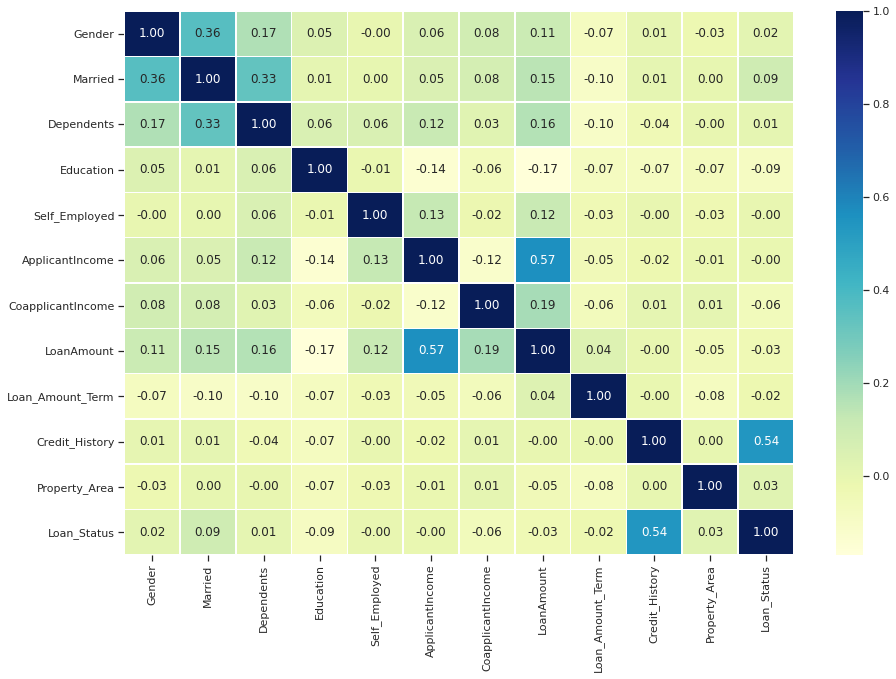

In [ ]:
correlation_matrix = Loan.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

**Observation**:

 1. Most highly corelated variable is : Credit_History, Least is: Education
 2. Only Credit History has a high correlation with Loan Status with 0.54. All other columns have negative correlation with values less than 0.1.

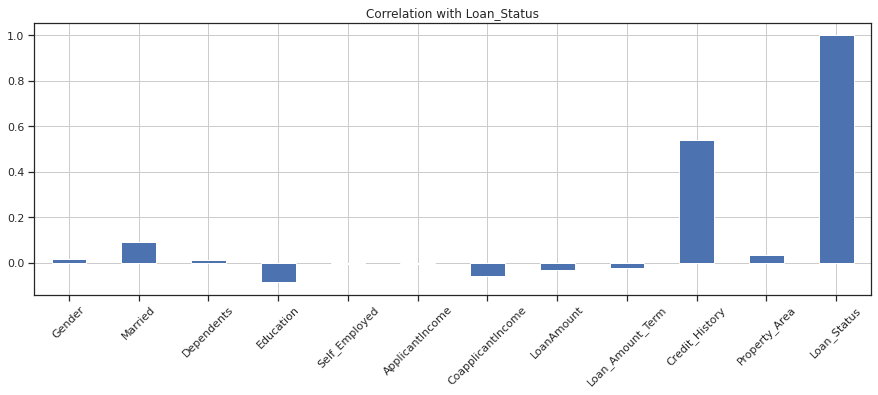

In [ ]:
#Correlation of Income with other attributes

Loan.corrwith(Loan.Loan_Status).plot.bar(figsize=(15,5),title = 'Correlation with Loan_Status',rot=45,grid=True)

**Observation:**

1. Attributes namely Gender , Married , Credit_History have positive correlation .
2. Attributes namely Education , CoapplicantIncome , LoanAmount have negative correlation .

In [ ]:
cor['Loan_Status'].sort_values(ascending=False)  #Display Coorelation values of all attributes

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059188
Education           -0.085884
Name: Loan_Status, dtype: float64

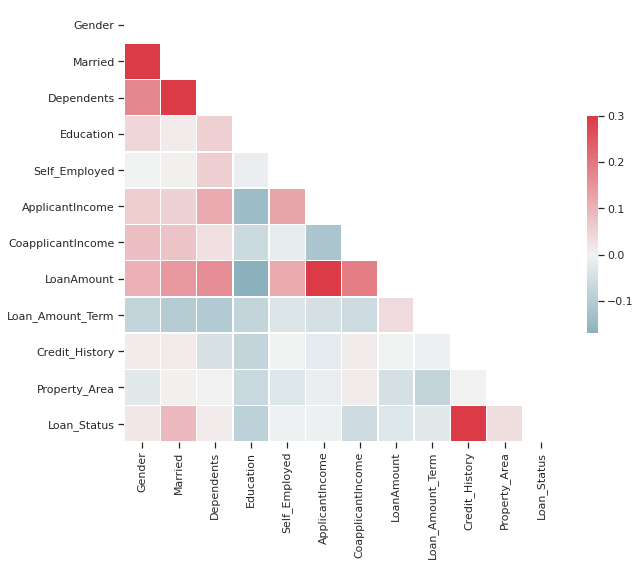

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# **Data Cleaning**

**1.Checking for Missing Values**

In [ ]:
Loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

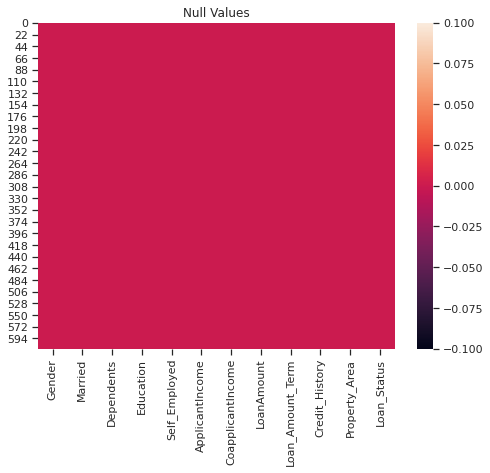

In [ ]:
#Plotting Null Values

plt.figure(figsize=[8,6])
sns.heatmap(Loan.isnull())
plt.title("Null Values")
plt.show()

There are no Null values present in the Dataset.

**2.Checking for Outliers**

Gender                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Dependents            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Self_Employed           AxesSubplot(0.125,0.518913;0.168478x0.16413)
ApplicantIncome      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
LoanAmount           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Loan_Amount_Term        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Credit_History       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Loan_Status          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

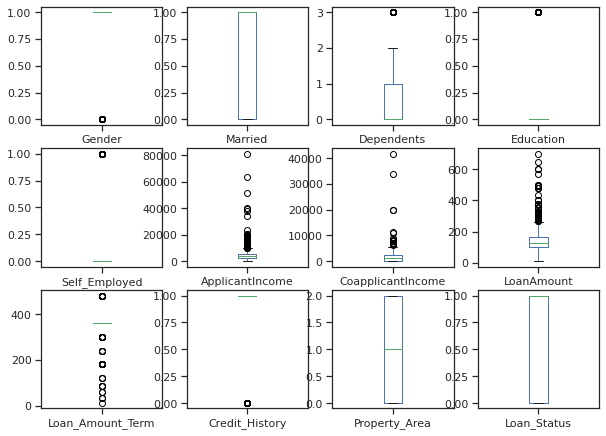

In [ ]:
#Plotting Outliers
Loan.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

**Observation :**
There are outliers present mostly in ApplicantIncome , CoapplicantIncome, LoanAMount , Loan_AMount_Term etc . Hence lets remove it Using Zscore method .


In [14]:
from scipy.stats import zscore

z=np.abs(zscore(Loan))


new_Loan = Loan [(z<3).all(axis=1) ]

In [15]:
new_Loan.shape

(577, 12)

In [16]:
Loan.shape

(614, 12)

In [ ]:
((614-548)/614)*100

10.749185667752444

**Observation :** 
There would be a loss of 10.74% of Data which is not affordable beacause we cannot loose more than 7-8% of Data as Data is precious.

**3.Checking for skewness in Data**

In [19]:
Loan.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145640
LoanAmount           0.020831
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

**Observation :**
There is skewness present in many of the columns in the Dataset .SO lets remove it

In [18]:
#Using PowerTransformer to remove skewness

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson') ##using yeo-johnson method due to presence of negative skewness
for i in Loan.skew().index[1:]:
    if Loan.skew().loc[i]>0.55:
        Loan[i]=pt.fit_transform(Loan[i].values.reshape(-1,1))
    if Loan.skew().loc[i]<-0.55:
        Loan[i]=pt.fit_transform(Loan[i].values.reshape(-1,1))
    else:
        Loan[i]=Loan[i]

**Split Data and Target**

In [10]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the Loan_Status, we will drop the ‘Loan_Status’ column.
from sklearn.model_selection import train_test_split

X = Loan.drop(['Loan_Status'],axis=1)
y = Loan['Loan_Status']

In [11]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,128.0,360,1,2
1,1,1,1,0,0,4583,1508,128.0,360,1,0
2,1,1,0,0,1,3000,0,66.0,360,1,2
3,1,1,0,1,0,2583,2358,120.0,360,1,2
4,1,0,0,0,0,6000,0,141.0,360,1,2


In [12]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

**Scalling of Data**

In [13]:
#Here we need to standardize them so that we can use the data properly. To do this, we need to apply the Scaling process to the data. Scikit-Learn's "StandardScaler" class can be used for this process:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [14]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.211241,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038731,-0.211241,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.306435,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.056551,0.273231,0.411733,1.223298


**Treating Class Imbalance**

There was a class imbalance problem in target variable Loan_Status . Hence we will treat class imbalance problem using SMOTE(Synthetic Minority Oversampling Technique) .

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 0)
X_res,  y_res = sm.fit_resample(X,y)

In [16]:
X_res.shape

(844, 11)

In [17]:
y_res.shape

(844,)

**Finding_Best_Random_State**

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

maxScore = 0
maxRS = 0

for i in range(1,1000):
  X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=.30,random_state=i)
  DT = DecisionTreeClassifier()
  DT.fit(X_train,y_train)
  pred = DT.predict(X_test)
  acc = accuracy_score(y_test,pred)
  if acc>maxScore:
    maxScore=acc
    maxRS=i
print('best accuracy score is :',maxScore*100,'with random_state:',maxRS)    

best accuracy score is : 84.25196850393701 with random_state: 263


**Observation :**
Best Random State is 263

**Preparation of Test and Train Data**

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [19]:
from sklearn.model_selection import train_test_split  # Import "train_test_split" method

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=maxRS)
# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

# **Modelling**

In [20]:
#Importing Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

**Defining a Function for plotting ROC_AUC Curve**

In [21]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([-1, 0], [-1, 0], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

**Classification_Models**

In [22]:
#Assinging objects for all classification models 
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GBR = GradientBoostingClassifier()
KN = KNeighborsClassifier()
SV = SVC()
GNB = GaussianNB()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy on Training Set: 71.56%

 Accuracy on Testing Set:
___________________________
73.96%


Confusion_Matrix
________________
[[41 40]
 [ 4 84]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.91      0.51      0.65        81
           1       0.68      0.95      0.79        88

    accuracy                           0.74       169
   macro avg       0.79      0.73      0.72       169
weighted avg       0.79      0.74      0.72       169



ROC_AUC Curve
_____________
ROC_AUC score : 0.7303591470258137
Plotting


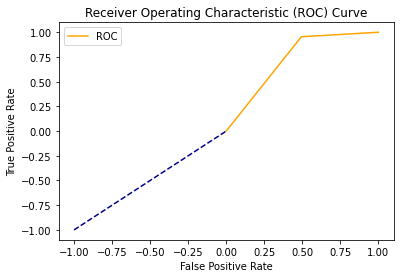



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 71.09%
Difference between accuracy_score and cross validation score is : 2.878979994364599


------------------------------------------X---------------------------------------------


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy on Training Set: 100.0%

 Accuracy on Testing Set:
___________________________
79.29%


Confusion_Matrix
________________
[[66 15]
 [20 68]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.77      

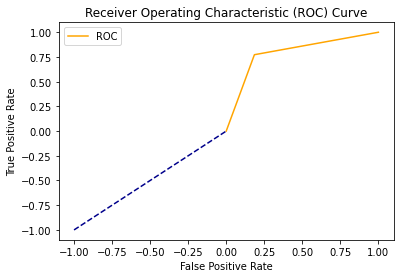



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 74.53%
Difference between accuracy_score and cross validation score is : 4.758382642998029


------------------------------------------X---------------------------------------------


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy on Training Set: 100.0%

 Accuracy on Testing Set:
___________________________
82.25%


Confusion_Matrix
________________
[[58 23]
 [ 7 81]]


Classifi

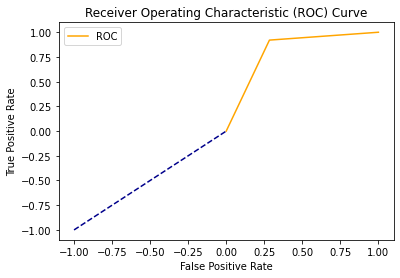



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 82.59%
Difference between accuracy_score and cross validation score is : -0.3409411101718973


------------------------------------------X---------------------------------------------


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy

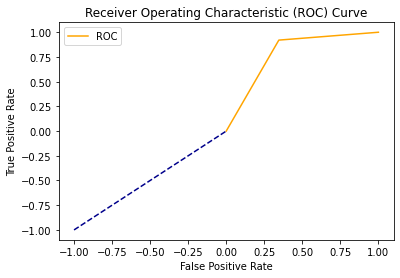



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 78.32%
Difference between accuracy_score and cross validation score is : 0.9685826993519271


------------------------------------------X---------------------------------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Accuracy on Training Set: 84.0%

 Accuracy on Testing Set:
___________________________
72.19%


Confusion_Matrix
________________
[[53 28]
 [19 69]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        81
           1       0.71      0.78      0.75        88

    accuracy                           0.72       169
   macro avg       0.72      0.72      0.72       169
weighted avg       0.72      0.72      0.72       16

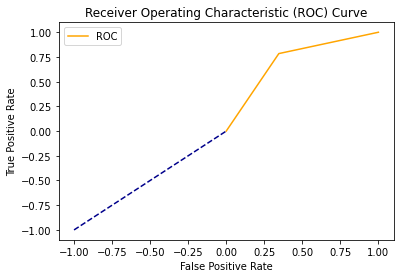



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 73.7%
Difference between accuracy_score and cross validation score is : -1.508875739644978


------------------------------------------X---------------------------------------------


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy on Training Set: 79.26%

 Accuracy on Testing Set:
___________________________
72.78%


Confusion_Matrix
________________
[[46 35]
 [11 77]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        81
           1       0.69      0.88      0.77        88

    accuracy                           0.73       169
   macro avg       0.75      0.72      0.72

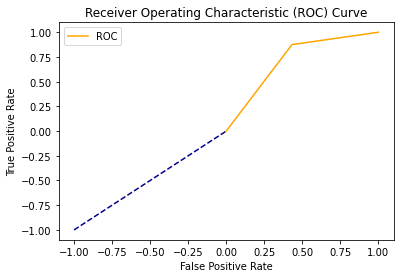



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 73.58%
Difference between accuracy_score and cross validation score is : -0.7952944491405987


------------------------------------------X---------------------------------------------


GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy on Training Set: 72.15%

 Accuracy on Testing Set:
___________________________
74.56%


Confusion_Matrix
________________
[[41 40]
 [ 3 85]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.93      0.51      0.66        81
           1       0.68      0.97      0.80        88

    accuracy                           0.75       169
   macro avg       0.81      0.74      0.73       169
weighted avg       0.80      0.75      0.73       169



ROC_AUC Curve
_____________
ROC_AUC score : 0.7360409652076318
Plotting


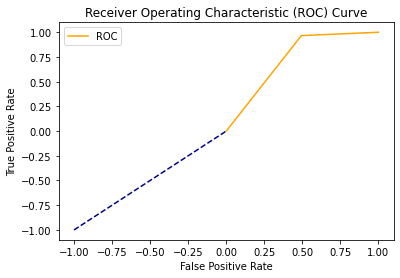



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 71.92%
Difference between accuracy_score and cross validation score is : 2.6380670611439854


------------------------------------------X---------------------------------------------




In [23]:
models = [LR,DT,RF,GBR,KN,SV,GNB]

for i in models:
    print (i)
    i.fit(X_train, y_train)
    pred = i.predict(X_test)
    print("Accuracy on Training Set: {}%".format(round(i.score(X_train, y_train)*100, 2)))
    print('\n Accuracy on Testing Set:')
    print('___________________________')
    print("{}%".format(round(accuracy_score(y_test, pred)*100,2)))
    print('\n')
    print('Confusion_Matrix')
    print('________________')
    print(confusion_matrix(y_test, pred))
    print('\n')
    print('Classification_Report')
    print('_____________________')
    print(classification_report(y_test, pred))
    print('\n')
    print('ROC_AUC Curve')
    print('_____________')
    print('ROC_AUC score :',roc_auc_score(y_test,pred))
    print('Plotting')
    fpr, tpr, thresholds = roc_curve(y_test,pred)
    plot_roc_curve(fpr, tpr)
    print('\n')
    print('Computing Cross_Validation Score')
    print('________________________________')
    cvs = cross_val_score(i,X_res,y_res,cv=5)
    print('Cross Validation Score of the model is :',"{}%".format(round(cvs.mean()*100,2)))
    print('Difference between accuracy_score and cross validation score is :',(accuracy_score(y_test,pred)*100)-(cvs.mean()*100))
    print('\n')
    print('------------------------------------------X---------------------------------------------')
    print('\n')

**Observation :**

1. Random Forest Classifier has the highest accuracy Score of 82.25% and KNeighbors Classifier has the least accuracy score of 72.19% .

2. Here Random Forest Classifier is the best Fitted Model for our Dataset as the difference between accuracy score and cross validation score is almost 0 in this case . Now we will perform Hyper_Parameter Tuning for more accuracy in our Model .

**Hyper-Parameter Tuning**

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameter={'n_estimators': [200, 500],
           'max_features': ['auto', 'sqrt', 'log2'],
           'max_depth' : [4,5,6,7,8],
           'criterion' :['gini', 'entropy']}

In [26]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [27]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [28]:
GCV.best_params_      #To get best parameters 

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

**Building Final_Model**

In [41]:
Final_mod = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=500)
Final_mod.fit(X_train,y_train)
pred_RF=Final_mod.predict(X_test)
acc_final=accuracy_score(y_test,pred_RF)
print('Final_Accuracy is :')
print('___________________')
print(acc_final*100)

Final_Accuracy is :
___________________
86.28994082840237


**Our Model Random Forest Classifier Learnt almost 86% of Accuracy .**

In [43]:
print('Croos-Validation score of Decision_Tree_Classifier is:',cross_val_score(Final_mod,X_res,y_res,cv=5).mean()*100)

Croos-Validation score of Decision_Tree_Classifier is: 85.67779656241196


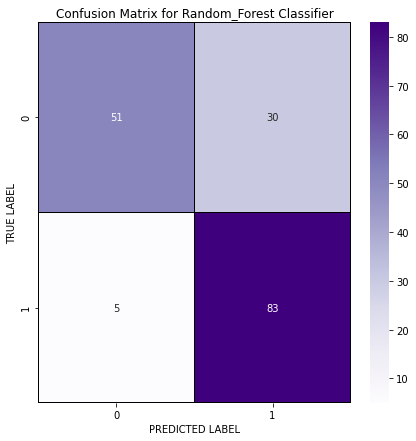

In [45]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred_RF)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random_Forest Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

         ROC_AUC CURVE OF Random_Forest Classifier
         _______________________________________


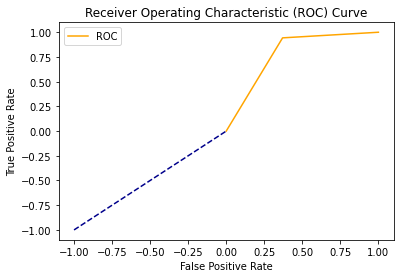

In [46]:
#Plotting ROC_AUC Curve
print('         ROC_AUC CURVE OF Random_Forest Classifier')
print('         _______________________________________')
fpr, tpr, thresholds = roc_curve(y_test,pred_RF)
plot_roc_curve(fpr, tpr)

In [47]:
print("Feature importances/;\n{}".format(Final_mod.feature_importances_))

Feature importances/;
[0.01327014 0.02873576 0.07388139 0.02796526 0.00884717 0.12291446
 0.0928455  0.12237808 0.01894338 0.3973487  0.09287017]


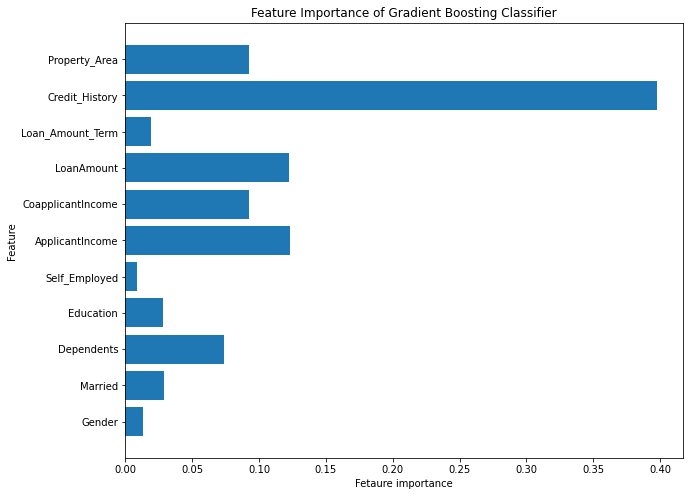

In [48]:
n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features),Final_mod.feature_importances_,align='center')
plt.yticks(np.arange(n_features),X.columns)
plt.title("Feature Importance of Gradient Boosting Classifier")
plt.xlabel("Fetaure importance")
plt.ylabel("Feature")
plt.ylim(-1,n_features)
plt.show()

**Observation :**

From the above plot , we see that Credit_History has the highest importance in Prediction .

,Y Test,Prediction
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


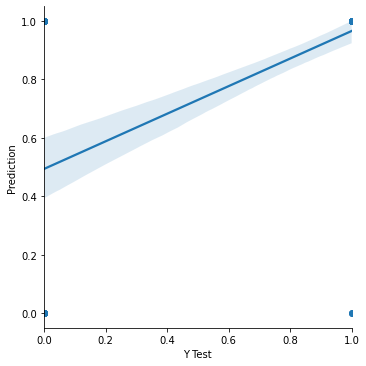

In [49]:
Loan_Prediction = pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=Loan_Prediction,palette='rainbow')
Loan_Prediction.head()

**Saving Final Model**

In [ ]:
# Saving the Predicted values in csv file

Loan_Prediction.to_csv('Loan_Application.csv')

In [ ]:
# Dumping Data in pickle file.

import joblib
joblib.dump(Final_mod,'Loan_Application_Status_Prediction.pkl')

['Loan_Application_Status_Prediction.pkl']